In [2]:
#pip install pandahouse  # если библиотека ещё не установлена
import pandahouse as ph
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

connection_default = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [4]:
q="""
SELECT COUNT(*)
FROM default.ldn_listings
LIMIT 10000
"""

In [5]:
df_hw1 = ph.read_clickhouse(query = q, connection = connection_default)
df_hw1

,count()
0,85207


In [6]:
#Задание 2

In [7]:
q2="""
SELECT 
    room_type,
    toFloat32OrNull(replaceRegexpAll(price,'[$,]', '')) as price  
FROM default.ldn_listings
ORDER BY id asc
LIMIT 1000
"""

In [8]:
house_df = ph.read_clickhouse(query = q2, connection = connection_default)
house_df

,room_type,price
0,Private room,65.0
1,Entire home/apt,100.0
2,Entire home/apt,300.0
3,Private room,150.0
4,Entire home/apt,65.0
...,...,...
995,Entire home/apt,110.0
996,Entire home/apt,110.0
997,Private room,65.0
998,Entire home/apt,100.0


In [9]:
house_agg = house_df.groupby('room_type').quantile(q=0.75)
house_agg 

,price
room_type,
Entire home/apt,160.00
Hotel room,157.00
Private room,70.00
Shared room,69.25


In [10]:
#Задание 4

In [11]:
q4="""
SELECT 
    room_type,
    toFloat32OrNull(replaceRegexpAll(price,'[$]', '')) as price,
     toFloat32OrNull(review_scores_rating) as review_scores_rating
FROM default.ldn_listings
WHERE review_scores_rating != 0
ORDER BY id asc
LIMIT 1000
"""

In [12]:
house_df_4 = house_df = ph.read_clickhouse(query = q4, connection = connection_default)
house_df_4

,room_type,price,review_scores_rating
0,Private room,65.0,97.0
1,Entire home/apt,100.0,96.0
2,Entire home/apt,300.0,94.0
3,Entire home/apt,65.0,93.0
4,Private room,29.0,96.0
...,...,...,...
995,Entire home/apt,165.0,100.0
996,Private room,99.0,93.0
997,Private room,45.0,100.0
998,Private room,20.0,88.0


In [13]:
house_for_plot =  house_df_4.groupby('room_type').agg({'price':'mean','review_scores_rating':'mean'})
#house_df_4.groupby('room_type').agg({'price':'mean','price':'mean'})

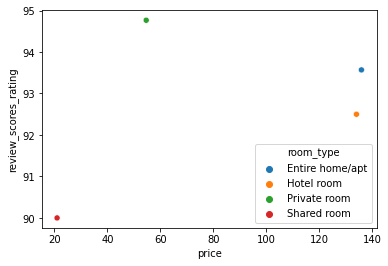

In [14]:
sns.scatterplot(data=house_for_plot, x='price', y='review_scores_rating', hue='room_type')	

In [15]:
#Задание 5


In [16]:
q5="""
SELECT 
    DISTINCT(host_id) as host_id,
    host_verifications
FROM default.ldn_listings
WHERE experiences_offered!='none'
"""

In [17]:
house_df_5  = ph.read_clickhouse(query = q5, connection = connection_default)
house_df_5

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [18]:
listdf2 = house_df_5['host_verifications'].apply(lambda x: x.strip('[]').replace("[", "").replace("]", "").split(','))
listdf2                                               

0       ['email',  'phone',  'facebook',  'reviews',  ...
1       ['email',  'phone',  'reviews',  'jumio',  'go...
2       ['email',  'phone',  'jumio',  'selfie',  'gov...
3       ['email',  'phone',  'manual_offline',  'jumio...
4       ['email',  'phone',  'reviews',  'offline_gove...
                              ...                        
1356    ['email',  'phone',  'reviews',  'jumio',  'go...
1357    ['email',  'phone',  'reviews',  'jumio',  'of...
1358    ['email',  'phone',  'reviews',  'jumio',  'go...
1359    ['email',  'phone',  'google',  'reviews',  'j...
1360    ['email',  'phone',  'reviews',  'manual_offli...
Name: host_verifications, Length: 1361, dtype: object

In [59]:
listdf2.explode('host_verifications').value_counts()

'email'                     1345
 'phone'                    1345
 'reviews'                  1309
 'government_id'            1196
 'jumio'                    1115
 'offline_government_id'     469
 'work_email'                279
 'facebook'                  270
 'selfie'                    252
 'identity_manual'           227
 'manual_offline'             70
 'google'                     34
 'kba'                        27
'phone'                       16
 'manual_online'              16
 'sent_id'                     6
Name: host_verifications, dtype: int64

In [ ]:
#Задание 6

In [61]:
q6 = """SELECT 
    neighbourhood_cleansed as  neighbourhood_cleansed ,
    experiences_offered as experiences_offered,
    count(experiences_offered) as experiences_count
FROM default.ldn_listings
WHERE experiences_offered!='none'
GROUP BY neighbourhood_cleansed, experiences_offered
ORDER BY experiences_count desc
limit 100

"""


In [62]:
house_df_6  = ph.read_clickhouse(query = q6, connection = connection_default)
house_df_6

,neighbourhood_cleansed,experiences_offered,experiences_count
0,Hackney,family,61
1,Tower Hamlets,business,58
2,Westminster,business,50
3,Hackney,social,49
4,Hammersmith and Fulham,business,48
...,...,...,...
95,Redbridge,social,2
96,Barking and Dagenham,social,2
97,Newham,romantic,1
98,Bexley,business,1


In [64]:
house_pivot= house_df_6.pivot(index='neighbourhood_cleansed', columns='experiences_offered', values='experiences_count')
house_pivot

experiences_offered,business,family,romantic,social
neighbourhood_cleansed,,,,
Barking and Dagenham,NaN,NaN,NaN,2.0
Barnet,7.0,7.0,3.0,5.0
Bexley,1.0,NaN,NaN,NaN
Brent,9.0,21.0,5.0,6.0
Bromley,3.0,2.0,NaN,4.0
Camden,36.0,30.0,19.0,25.0
City of London,7.0,1.0,NaN,NaN
Croydon,2.0,3.0,NaN,4.0
Ealing,6.0,13.0,NaN,5.0


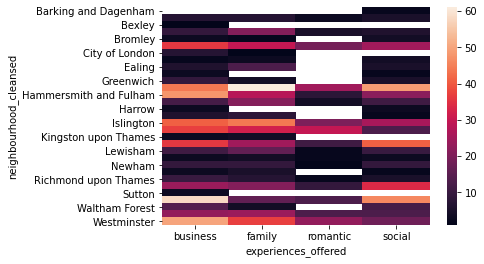

In [68]:
figsize=(20,16)
cmap=sns.cubehelix_palette(as_cmap=True)

sns.heatmap(data=house_pivot)


TypeError: 'tuple' object is not callable

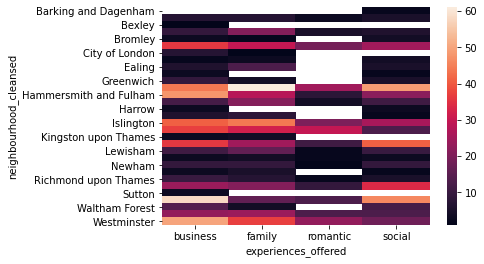

In [72]:
sns.heatmap(data=house_pivot)
figsize(200,160)

In [ ]:
#Задание 7

In [73]:
q7 = """
SELECT 
    room_type,
    toFloat32OrNull(replaceRegexpAll(price,'[$]', '')) as price
FROM default.ldn_listings
WHERE experiences_offered != 'none'
LIMIT 1000
"""

In [75]:
house_df_7  = ph.read_clickhouse(query = q7, connection = connection_default)
house_df_7

,room_type,price
0,Private room,65.0
1,Entire home/apt,100.0
2,Private room,150.0
3,Private room,45.0
4,Private room,25.0
...,...,...
995,Entire home/apt,40.0
996,Entire home/apt,150.0
997,Entire home/apt,250.0
998,Private room,28.0


In [ ]:
#Задание 8

In [76]:
q8 = """
SELECT 
    room_type,
    toFloat32OrNull(replaceRegexpAll(price,'[$]', '')) as price,
    toDateOrZero(first_review)as first_review
FROM default.ldn_listings
WHERE first_review>'2010-01-01'
LIMIT 1000
"""

In [78]:
house_df_8  = ph.read_clickhouse(query = q8, connection = connection_default)
house_df_8 

,room_type,price,first_review
0,Private room,65.0,2010-08-18
1,Entire home/apt,300.0,2011-03-21
2,Entire home/apt,65.0,2016-03-05
3,Private room,29.0,2010-04-14
4,Private room,100.0,2010-10-16
...,...,...,...
995,Private room,45.0,2012-11-07
996,Private room,51.0,2013-03-18
997,Entire home/apt,79.0,2012-09-17
998,Entire home/apt,110.0,2012-09-24
